# <center>Ma trận trong Python - Đồ án 1</center>

## Mục lục
* [Thực hành](#c1)
    * [Khai báo ma trận](#c11)
    * [Các phép toán cơ bản trên ma trận](#c12)
    * [Định thức](#c13)
    * [Nghịch đảo ma trận](#c14)
* [Đồ án 1 - Color Compression](#c2)
    * [Nội dung đồ án](#c21)
    * [Quy định nộp bài](#c22)
    * [Quy định chấm bài](#c23)

## Thực hành <a class="anchor" id="c1"></a>

Trong bài lab này, chúng ta sẽ đồng thời sử dụng `list` và  `NumPy` để thực hiện các phép toán trên ma trận.

Trong đó, sử dụng `list` để thực hiện các phép toán bằng code thủ công; sử dụng `NumPy` để gọi các hàm có sẵn trong thư viện.

In [2]:
import numpy as np

# From lab 01
def my_print(x, is_round=False, sep=' '):
    if isinstance(x, list) and x:
        if isinstance(x[0], list): # list of list
            if is_round:
                x = [[round(e, 2) for e in row] for row in x]

            m, n = len(x), len(x[0])
            widths = [max(len(str(ai[j])) for ai in x) for j in range(n)]
            rows = [sep.join(format(str(ai[j]), f'>{widths[j]}') for j in range(n)) for ai in x]
            print('[' + '\n'.join((' [' if i > 0 else '[') + rows[i] + ']' for i in range(m)) + ']')
        else: # list
            if is_round:
                x = [round(e, 2) for e in x]

            print('[' + sep.join(str(e) for e in x) + ']')
    else:
        print(x)

### Khai báo ma trận <a class="anchor" id="c11"></a>

Trong Python, ma trận có thể biểu diễn bằng kiểu dữ liệu `list` (`list` of `list`) hoặc mảng NumPy 2 chiều (`np.array`). Giả sử với ma trận:
$$A = \begin{bmatrix}
    1   & 1.5 & -1.2\\ 
    2   & 3.7 & 8\\ 
    3.5 & 2.5 & 4
    \end{bmatrix}$$

Ta có thể biểu diễn bằng kiểu dữ liệu `list` như sau:

In [112]:
A_list = [[1,   1.5, -1.2],
          [2,   3.7, 8   ],
          [3.5, 2.5, 4   ]]

print(f'- The number of rows: {len(A_list)}\n- The number of columns: {len(A_list[0])}')
my_print(A_list)

- The number of rows: 3
- The number of columns: 3
[[  1 1.5 -1.2]
 [  2 3.7    8]
 [3.5 2.5    4]]


Và có thể biểu diễn trong NumPy như sau:

In [114]:
A_np = np.array(A_list)

print(f'- The number of rows: {A_np.shape[0]}\n- The number of cols: {A_np.shape[1]}')
print(A_np)

- The number of rows: 3
- The number of cols: 3
[[ 1.   1.5 -1.2]
 [ 2.   3.7  8. ]
 [ 3.5  2.5  4. ]]


#### Khởi tạo ma trận toàn 0

##### Trên `list` 

In [115]:
def create_zero_matrix(n_row, n_col):
    # return [[0 for _ in range(n_col)] for _ in range(n_row)]
    return [[0] * n_col] * n_row      # Quick question: What's wrong with this approach?
    # Are there ways to optimize the code?

In [86]:
my_print(create_zero_matrix(3, 3))

[[0 0 0]
 [0 0 0]
 [0 0 0]]


##### Trên `NumPy`

In [87]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Khai báo ma trận toàn 1

##### Trên `list`

In [8]:
### TODO: YOUR CODE HERE
def create_one_matrix(n_row, n_col):
    return [[1] * n_row] * n_col

my_print(create_one_matrix(3, 3))

[[1 1 1]
 [1 1 1]
 [1 1 1]]


##### Trên `NumPy`

In [16]:
### TODO: YOUR CODE HERE
np.ones((3, 3))

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

#### Khai báo ma trận đơn vị

##### Trên `list`

In [116]:
def create_identity_matrix(n):
    return [[1 if i == j else 0 for j in range(n)] for i in range(n)]
    # return [[int(i == j) for j in range(n)] for i in range(n)]

In [117]:
my_print(create_identity_matrix(3))

[[1 0 0]
 [0 1 0]
 [0 0 1]]


##### Trên `NumPy`

In [118]:
### TODO: print(YOUR CODE HERE)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Các phép toán cơ bản trên ma trận <a class="anchor" id="c12"></a>

#### Nhân số với ma trận

In [89]:
def multiply_scalar_matrix(scalar, A_list):
    return [[scalar * a for a in a_row] for a_row in A_list]

In [90]:
my_print(multiply_scalar_matrix(2, A_list))

[[ 0  2  4]
 [ 6 10 10]
 [10 14 10]]


#### Cộng ma trận

##### Cộng ma trận với ma trận

###### Thực hiện trên `A_list` (cách làm thủ công)

In [155]:
def add_matrix_list(A_list, B_list):
#     # Method 1: Basic
#     # Init
#     C_list = [[0 for _ in range(len(A_list[0]))] for _ in range(len(A_list))]

#     m_row = len(A_list)
#     n_col = len(A_list[0])
#     for i_row in range(m_row):
#         for i_col in range(n_col):
#             C_list[i_row][i_col] = A_list[i_row][i_col] + B_list[i_row][i_col]
     
    
    # Method 2: List comprehension
    # C_list = [[a + b for (a, b) in zip(a_row, b_row)] for (a_row, b_row) in zip(A_list, B_list)]   

    # Method 3: Map
    C_list = [
        list(map(lambda a, b: a + b, zip(*pair))) 
        for pair in zip(A_list, B_list)
    ] # Quick question: What does this code mean: zip(*pair)?
    
    return C_list

In [153]:
# Init matrix
B_list = [[2, 1.5, 1.2],
          [3, 7, -9.5],
          [5.5, 2, 4]]

print('A_list:')
my_print(A_list)
print()
print('B_list:')
my_print(B_list)

print()
print('C_list:')
my_print(add_matrix_list(A_list, B_list))

A_list:
[[  1 1.5 -1.2]
 [  2 3.7    8]
 [3.5 2.5    4]]

B_list:
[[  2 1.5  1.2]
 [  3   7 -9.5]
 [5.5   2    4]]

C_list:
[[  3  3.0  0.0]
 [  5 10.7 -1.5]
 [9.0  4.5    8]]


###### Thực hiện trên `A_np` (sử dụng hàm của thư viện `NumPy`)

In [151]:
B_np = np.array(B_list)

### TODO: print(YOUR CODE HERE)
print(A_np + B_np)

[[ 3.   3.   0. ]
 [ 5.  10.7 -1.5]
 [ 9.   4.5  8. ]]


##### Cộng ma trận với 1 số

###### Sử dụng `list` 

In [23]:
### TODO: YOUR CODE HERE
def add_matrix_number(A_list, num):
    return list(map(lambda x: list(map(lambda y: y + num, x)), A_list))

# xài lại mấy hàm trên

my_print(add_matrix_number(create_zero_matrix(3,3), 2))

[[2 2 2]
 [2 2 2]
 [2 2 2]]


###### Sử dụng `NumPy`

In [38]:
### TODO: YOUR CODE HERE
# A.np + 2


#### Trừ, nhân, chia các phần tử tương ứng của 2 ma trận

Tương tự với cộng 2 ma trận, các phép toán còn lại tương tự.

##### Trên `A_list`

In [91]:
[list(map(lambda a, b: a / b, *pair)) for pair in zip(A_list, B_list)]

[[0.0, 0.6666666666666666, 1.6666666666666667],
 [1.0, 0.7142857142857143, -0.5263157894736842],
 [0.9090909090909091, 3.5, 1.25]]

In [92]:
def op_matrix_list(A_list, B_list, op):
    if op == '+':
        return [list(map(lambda a, b: a + b, *pair)) for pair in zip(A_list, B_list)]
    elif op == '-':
        return [list(map(lambda a, b: a - b, *pair)) for pair in zip(A_list, B_list)]
    elif op == '*': # element-wise
        return [list(map(lambda a, b: a * b, *pair)) for pair in zip(A_list, B_list)]
    elif op == '/': # element-wise
        return [list(map(lambda a, b: a / b, *pair)) for pair in zip(A_list, B_list)]
    else:
        raise ValueError(f'Can\'t understand operator {op}')

In [93]:
print('Subtraction of two matrices:')
my_print(op_matrix_list(A_list, B_list, '-'))

print('\nElement-wise multiplication of two matrices:')
my_print(op_matrix_list(A_list, B_list, '*'))

print('\nElement-wise division of two matrices:') 
my_print(op_matrix_list(A_list, B_list, '/'))

Subtraction of two matrices:
[[  -2 -0.5  0.8]
 [   0   -2 14.5]
 [-0.5    5    1]]

Element-wise multiplication of two matrices:
[[   0 1.5   2.4]
 [   9  35 -47.5]
 [27.5  14    20]]

Element-wise division of two matrices:
[[               0.0 0.6666666666666666  1.6666666666666667]
 [               1.0 0.7142857142857143 -0.5263157894736842]
 [0.9090909090909091                3.5                1.25]]


##### Trên `A_np`

In [94]:
print('Subtraction of two matrices: \n', A_np - B_np)
print('\nElement-wise multiplication of two matrices: \n', A_np * B_np)
print('\nElement-wise division of two matrices: \n', A_np / B_np)

Subtraction of two matrices: 
 [[-2.  -0.5  0.8]
 [ 0.  -2.  14.5]
 [-0.5  5.   1. ]]

Element-wise multiplication of two matrices: 
 [[  0.    1.5   2.4]
 [  9.   35.  -47.5]
 [ 27.5  14.   20. ]]

Element-wise division of two matrices: 
 [[ 0.          0.66666667  1.66666667]
 [ 1.          0.71428571 -0.52631579]
 [ 0.90909091  3.5         1.25      ]]


#### Nhân 2 ma trận

##### Trên `A_list`

In [95]:
def multiply_matrix(A_list, B_list):
    if len(A_list[0]) != len(B_list):
        print('The dimensions are not compatible')

    # Method 1
    # m_row = len(A_list)
    # n_col = len(B_list[0])

    # C_list = create_zero_matrix(m_row, n_col)

    # for i_row in range(m_row):
    #     for i_col in range(n_col):
    #         total = 0
    #         for i,a in enumerate(A_list[i_row]):  # Iterate over each item in the row i_row (A_list)
    #             total += a*B_list[i][i_col]       # Iterate over each item in the col i_col (B_list)
    #         C_list[i_row][i_col] = total

    # return C_list

    # Method 2
    # return [[sum(i * j for i, j in zip(row, col)) for col in zip(*B_list)] for row in A_list]

    # Method 3: TODO: Map with lambda
    # YOUR CODE HERE (không được xài for ở đây)
    return list(map(lambda row: list(map(lambda col: sum(map(lambda i, j: i * j, row, col)), zip(*B_list))), A_list))


In [40]:
my_print(multiply_matrix(A_list, B_list))

[[14.0 11.0  -1.5]
 [48.5 49.5 -23.9]
 [58.5 66.5 -40.5]]


##### Trên `A_np`

In [41]:
np.matmul(A_np, B_np) # Quick question: What is the symbol used for matmul?

array([[ 14. ,  11. ,  -1.5],
       [ 48.5,  49.5, -23.9],
       [ 58.5,  66.5, -40.5]])

#### Chuyển vị ma trận

In [56]:
### YOUR CODE HERE

## list
def transpose_matrix(A_list):
    return list(map(list, zip(*A_list)))

# my_print(A_list)
# print('\n')
# my_print(transpose_matrix(A_list))
print(list(zip(*A_list)))
print(A_list)

## numpy
A_np
np.transpose(A_np)

[(0, 3, 5), (1, 5, 7), (2, 5, 5)]
[[0, 1, 2], [3, 5, 5], [5, 7, 5]]


array([[0, 3, 5],
       [1, 5, 7],
       [2, 5, 5]])

### Định thức <a class="anchor" id="c13"></a>

In [50]:
A_list = [[0, 1, 2],
          [3, 5, 5],
          [5, 7, 5]]

A_np = np.array(A_list)



#### Trên `A_list`

In [65]:
def create_submatrix(A, i_row, i_col):
    sub_A = [r[:] for r in A] # Deep copy A
    
    # Remove row
    sub_A = sub_A[:i_row] + sub_A[i_row+1:]
    
    # Remove col
    n_row_sub = len(sub_A)
    for i in range(n_row_sub): 
        sub_A[i] = sub_A[i][:i_col] + sub_A[i][i_col+1:]
        
    return sub_A


# For square matrix
def calc_determinant(A):
    # Basic case, determinant of matrix size 1x1
    if len(A) == 1 and len(A[0]) == 1:
        return A[0][0]
    
    total = 0
 
    # Iterate over each column to remove
    for i_col in range(len(A[0])):
        sub_A = create_submatrix(A, 0, i_col)
 
        # Find sign
        sign = (-1) ** (i_col % 2)
        
        # Use recursion for submatrix
        sub_det = calc_determinant(sub_A)
        
        # Incrementally update the output
        total += sign * A[0][i_col] * sub_det 
 
    return total

In [53]:
calc_determinant(A_list)

2

#### Trên `A_np` 

In [54]:
np.linalg.det(A_np)

2.00000000000001

### Nghịch đảo ma trận <a class="anchor" id="c14"></a>

#### Trên `A_list` 

##### Cách 1: Sử dụng phép khử Gauss-Jordan

In [96]:
import math

# From lab 01
def is_zero(x):
    return math.isclose(x, 0, abs_tol=1e-10)

def row_switch(A, i, k):
    'di <-> dk'
    A[i], A[k] = A[k], A[i]

def row_mul(A, i, alpha):
    'di = alpha*di'
    A[i] = [alpha*Aii for Aii in A[i]]

def row_add(A, i, k, alpha):
    'di = di + alpha*dk'
    A[i] = [0 if is_zero(Aii + alpha*Aki) else Aii + alpha*Aki for Aii, Aki in zip(A[i], A[k])]

def create_augmented_matrix(A):
    I = create_identity_matrix(len(A))
    return [Ai[:] + Ii for Ai, Ii in zip(A, I)]

# Gauss-Jordan elimination
def Gauss_Jordan(A):
    # Append unique matrix to A matrix
    augmented_A = create_augmented_matrix(A)

    n_row = len(A)
    n_col_A = len(A[0])

    row = col = 0

    while row < n_row:
        # Step 1: Identify the leftmost column that contains only zeros
        while col < n_col_A and all(is_zero(augmented_A[i][col]) for i in range(row, n_row)):
            col += 1
        if col == n_col_A:
            break
        
        # Step 2: Select the first row that contains non-zero coefficient
        pivot_row = row + [not is_zero(augmented_A[i][col]) for i in range(row, n_row)].index(True)
        row_switch(augmented_A, row, pivot_row)

        # Step 3: Leading 1 option
        row_mul(augmented_A, row, 1/augmented_A[row][col])

        # Step 4: Add an appropriate multiple of the current row to the other rows, so that the coefficients in the column col become 0
        for i in range(n_row):
            if i == row:
                continue
            
            multiplier = augmented_A[i][col]/augmented_A[row][col]
            row_add(augmented_A, i, row, -multiplier)

        row += 1

    return augmented_A

# Invert matrix using Gauss-Jordan
def invert_matrix_GJ(A):
    n_col_A = len(A[0])
    GJ_A = Gauss_Jordan(A)

    # Separate the left and right matrices from the output matrix after using Gauss-Jordan elimination
    lmatrix = [GJ_Ai[:n_col_A] for GJ_Ai in GJ_A]
    rmatrix = [GJ_Ai[n_col_A:] for GJ_Ai in GJ_A]

    # Determine whether the matrix is invertible
    if lmatrix[-1][-1] == 0:
        print('Singular matrix')
        return None

    return rmatrix


In [97]:
my_print(invert_matrix_GJ(A_list), is_round=True)

[[-5.0  4.5 -2.5]
 [ 5.0 -5.0  3.0]
 [-2.0  2.5 -1.5]]


##### Cách 2: Sử dụng công thức $A^{-1} = \dfrac{adj(A)}{det(A)}$

In [98]:
def transpose(A):
    return list(map(list, zip(*A)))


# For square matrix
def invert_matrix(A):
    n_row = len(A)
    n_col = len(A[0])
    
    # If the matrix is not square
    if n_row != n_col:
        print('Error: Not a square matrix')
        return None
    
    # Calc determinant for the matrix
    det_A = calc_determinant(A)
    
    # Return None if the matrix is singular
    if det_A == 0:
        print('Error: Singular matrix')
        return None
    
    # Basic case, matrix size 1x1
    if n_row == 1 and n_col == 1:
        return 1/det_A
    
    # Create the output matrix
    A_res = [[0 for _ in range(n_col)] for _ in range(n_row)]
    
    # A_res = adj(A)/det_A -----------------------------------------------------------------
    # Step 1: Transpose the original matrix
    A_trans = transpose(A)
    
    # Step 2: Calc the adj(A) along with assign result into A_res
    for i_row in range(n_row):
        for i_col in range(n_col):
            # Create submatrix
            sub_A = create_submatrix(A_trans, i_row, i_col)
 
            # Find sign
            sign = (-1) ** (i_row + i_col)
            
            A_res[i_row][i_col] = sign * calc_determinant(sub_A)
 
    # Step 3: Divide by determinant
    A_res = multiply_scalar_matrix(1/det_A, A_res)
    
    return A_res

**Tham khảo:**
- [Invertible matrix](https://en.wikipedia.org/wiki/Invertible_matrix)
- [Ma trận khả nghịch](https://vi.wikipedia.org/wiki/Ma_tr%E1%BA%ADn_kh%E1%BA%A3_ngh%E1%BB%8Bch)
- [Adjugate matrix](https://en.wikipedia.org/wiki/Adjugate_matrix)

In [99]:
my_print(invert_matrix(A_list))

[[-5.0  4.5 -2.5]
 [ 5.0 -5.0  3.0]
 [-2.0  2.5 -1.5]]


#### Trên `A_np` 

In [78]:
print(np.linalg.inv(A_np))

[[-5.   4.5 -2.5]
 [ 5.  -5.   3. ]
 [-2.   2.5 -1.5]]


---

## Đồ án 1 - Color Compression <a class="anchor" id="c2"></a>

### Nội dung đồ án <a class="anchor" id="c21"></a>

#### Giới thiệu

Một bức ảnh có thể lưu trữ dưới ma trận của các điểm ảnh. Có nhiều loại ảnh được sử dụng trong thực tế, ví dụ: ảnh xám, ảnh màu,... 

Đối với ảnh xám, một điểm ảnh sẽ là được biểu diễn bằng giá trị không âm. 

Ví dụ ta có thể dùng ma trận này:
$$\begin{bmatrix}
255 & 0 & 0  & 0  & 255 \\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 0  & 0  & 255
\end{bmatrix}$$

có thể biểu diễn cho ảnh xám có nội dung như sau:

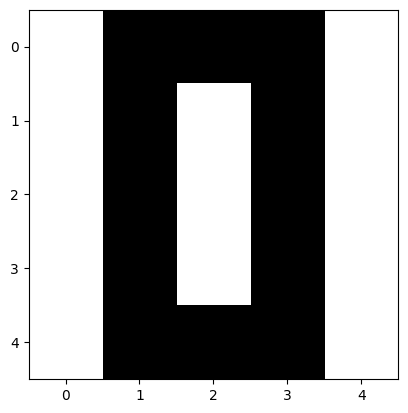

In [102]:
import matplotlib.pyplot as plt
plt.imshow(np.array([[255, 0, 0, 0, 255], 
                     [255, 0, 255, 0, 255], 
                     [255, 0, 255, 0, 255], 
                     [255, 0, 255, 0, 255], 
                     [255, 0, 0, 0, 255]]), cmap='gray', vmin=0, vmax=255);

Ảnh màu được sử dụng phổ biến là ảnh RGB, trong đó, mỗi điểm ảnh sẽ lưu trữ 3 thông tin kênh màu (mỗi kênh màu 1 byte) là: R (red - đỏ), G (green - xanh lá), B (blue - xanh dương). Ta có thể sử dụng ma trận:
```
                    [[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]
```
để biểu diễn cho ảnh màu có nội dung sau:

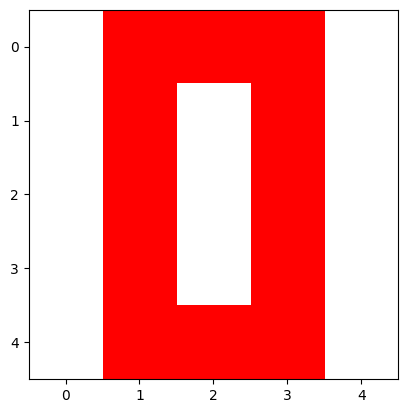

In [104]:
plt.imshow(np.array([[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]));

Như vậy, số màu trong ảnh RGB có thể là $256^3 \approx 1.7 \times 10^7$. Với số lượng màu khá lớn, khi lưu trữ ảnh có thể sẽ tốn chi phí lưu trữ. Do đó bài toán đặt ra là giảm số lượng màu để biểu diễn ảnh sao cho nội dung ảnh được bảo toàn nhất có thể.

Cho ảnh như sau:

![img](https://i.ibb.co/NxrJ06N/project01-img.png)

Trong ví dụ trên, số lượng màu cho ảnh ban đầu là 145856 màu. Sau khi giảm số lượng màu xuống còn 7, ảnh không còn được chi tiết nhưng cơ bản vẫn bảo toàn nội dung của ảnh ban đầu.

Nguồn ảnh: Photo by Smileus on Getty Images·

Để thực hiện giảm số lượng màu, ta cần tìm ra các đại diện có thể thay thế cho một nhóm màu. Cụ thể trong trường hợp ảnh RGB, ta cần thực hiện gom nhóm các pixel $(\mathbb{R}^3)$ và chọn ra đại diện cho từng nhóm. Như vậy, bài toán trên trở thành gom nhóm các vec-tơ.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import requests
from io import BytesIO

# Bước 1: Tải hình ảnh từ URL
image_url = "https://i.ibb.co/NxrJ06N/project01-img.png"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Bước 2: Chuyển đổi ảnh thành mảng numpy
image = np.array(image)

# Bước 3: Reshape ảnh thành ma trận 2D nơi mỗi hàng là một pixel và mỗi cột là một kênh màu (R, G, B)
pixels = image.reshape((-1, 3))

# Bước 4: Áp dụng thuật toán K-Means
num_colors = 7
kmeans = KMeans(n_clusters=num_colors, random_state=42)
kmeans.fit(pixels)

# Bước 5: Gán lại màu cho từng pixel
new_colors = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_
new_pixels = new_colors[labels].reshape(image.shape)

# Bước 6: Hiển thị ảnh gốc và ảnh sau khi giảm số lượng màu
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Quantized Image with {num_colors} Colors")
plt.imshow(new_pixels)
plt.axis('off')

plt.show()


ModuleNotFoundError: No module named 'requests'

#### Yêu cầu

Trong đồ án này, bạn được yêu cầu cài đặt chương trình giảm số lượng màu cho ảnh sử dụng thuật toán [K-Means](https://en.wikipedia.org/wiki/K-means_clustering).

Cụ thể:
- Sử dụng ngôn ngữ lập trình Python
- Cài đặt các hàm yêu cầu trong tập tin Jupyter Notebook `MSSV.ipynb` được đính kèm:
    - Đọc ảnh
    - Hiển thị ảnh
    - Lưu ảnh
    - Chuyển đổi ảnh từ kích thước 2D (height, width, channels) sang 1D (height $\times$ width, channels)
    - Gom nhóm màu sử dụng K-Means
    - Tạo ảnh mới từ các màu trung tâm (từ K-Means)
    - Hàm main: 
        - Cho phép nhập vào tên tập tin ảnh mỗi lần chương trình thực thi (gợi ý sử dụng `input()` trong Python)
        - Cho phép lưu ảnh với tối thiểu 2 định dạng là pdf và png
- Các thư viện được phép sử dụng:
    - `NumPy` (tính toán ma trận)
    - `PIL` (đọc, ghi ảnh)
    - `matplotlib` (hiển thị ảnh)

<font style="color:red">*Lưu ý: Không sử dụng K-Means đã được cài đặt sẵn trong các thư viện trong bài nộp. Sinh viên có thể sử dụng K-Means trong `scikit-learn` ĐỂ KIỂM TRA (và xóa đi trước khi nộp bài).* </font>


### Quy định bài nộp <a class="anchor" id="c22"></a>

- Thực hiện toàn bộ bài làm trên 1 tập tin Jupyter Notebook (.ipynb)


- Bạn nộp tập tin `MSSV.zip` được nén từ thư mục MSSV chứa các tập tin sau:
    1. Báo cáo toàn bộ bài làm: `MSSV.pdf`
    2. Mã nguồn: `MSSV.ipynb`


- Trong đó, nội dung tập tin báo cáo gồm có:
    - Thông tin cá nhân: Họ và tên, MSSV, lớp
    - Ý tưởng thực hiện, mô tả các hàm
    - Hình ảnh kết quả với từng số lượng màu, `k = {3, 5, 7}`. Sinh viên có thể thử nghiệm thêm `k` khác
    - **Nhận xét kết quả trên**
    - Báo cáo cần có số trang và tài liệu tham khảo
    
- Ví dụ minh họa cây thư mục bài nộp sau khi giải nén tập tin `MSSV.zip` như sau:
    ```
    MSSV
    ├── MSSV.pdf
    └── MSSV.ipynb
    ```

### Quy định chấm bài <a class="anchor" id="c23"></a>

Đồ án chiếm **10%** tổng điểm môn học.

Những trường hợp sau đây sẽ bị 0 điểm toàn bộ đồ án:
- Nộp sai quy định
- Không nộp báo cáo
- Thực thi mã nguồn báo lỗi

<font style="color:red">**LƯU Ý: CÁC BÀI LÀM GIỐNG NHAU (BÁO CÁO HOẶC MÃ NGUỒN) SẼ NHẬN 0 ĐIỂM TOÀN BỘ PHẦN THỰC HÀNH**</font>